<a href="https://colab.research.google.com/github/truongkhng/AI-Projects/blob/main/Cifar100_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cifar100_CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization
from keras.datasets import cifar100
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from random import randint

In [ ]:
# Processing Data
(x_train,y_train),(x_test,y_test) = cifar100.load_data()
x_label = ('apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm')
x_test_original = x_test;
y_test_original = y_test;

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)

169017344/169001437 [==============================] - 2s 0us/step


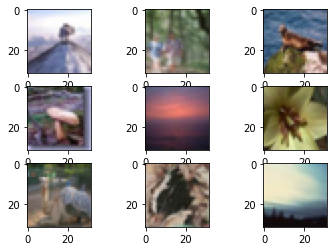

In [ ]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow (x_test_original[i],cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
model = Sequential()
model.add (Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',
                  input_shape=(32,32,3)))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [ ]:
checkpoint = ModelCheckpoint(filepath= "Cifar100-weights-{epoch:02d}-{val_accuracy:.4f}.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model.compile(loss='categorical_crossentropy',optimizer=SGD(),metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=32, epochs=100,verbose=1, 
                    validation_data=(x_test, y_test),callbacks=callbacks_list)

Epoch 1/100
1563/1563 [==============================] - ETA: 0s - loss: 4.1623 - accuracy: 0.0761
Epoch 1: val_accuracy improved from -inf to 0.11060, saving model to Cifar100-weights-01-0.1106.h5
1563/1563 [==============================] - 44s 21ms/step - loss: 4.1623 - accuracy: 0.0761 - val_loss: 3.8827 - val_accuracy: 0.1106
Epoch 2/100
1561/1563 [============================>.] - ETA: 0s - loss: 3.5370 - accuracy: 0.1577
Epoch 2: val_accuracy improved from 0.11060 to 0.18160, saving model to Cifar100-weights-02-0.1816.h5
1563/1563 [==============================] - 30s 19ms/step - loss: 3.5369 - accuracy: 0.1578 - val_loss: 3.4203 - val_accuracy: 0.1816
Epoch 3/100
1560/1563 [============================>.] - ETA: 0s - loss: 3.2076 - accuracy: 0.2129
Epoch 3: val_accuracy improved from 0.18160 to 0.24060, saving model to Cifar100-weights-03-0.2406.h5
1563/1563 [==============================] - 31s 20ms/step - loss: 3.2075 - accuracy: 0.2129 - val_loss: 3.0757 - val_accuracy: 0.

In [ ]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.7781991958618164
Test accuracy: 0.5371000170707703


In [ ]:
model_json = model.to_json()
with open('Cifar100_config.json', 'w') as json_file:
    json_file.write(model_json)

picture  9879
actual: [73]
predictions: [73]


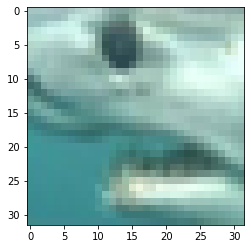

In [ ]:
# Show original Image
i = randint(0,len(y_test_original)-1)
print ("picture ",i)
print("actual:", y_test_original[i])
plt.imshow(x_test_original[i])

# Sample Predict
sample = np.array([x_test[i]])
predictions = np.argmax(model.predict(sample), axis=-1)
print("predictions:", predictions)
print("predictions label:", x_label[int(predictions)])

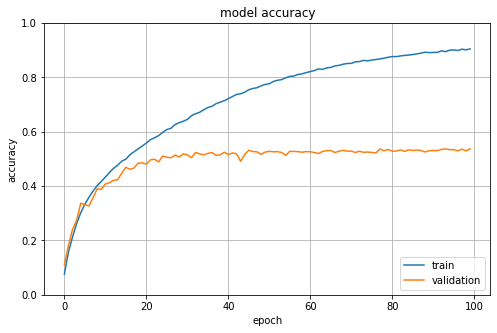

In [ ]:
# Graphs of accuracy
plt.figure(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='lower right')
plt.show()